Sintering Trajectories: Description on How Density, Surface Area, and Grain Size Change

S = Normalized Surface Area  
Sm = Surface Area  
Sv = Volume Based Surface Area  
So = Original Surface Area  
Ps = Sintered Density  
Pt = Theoretical Density  
f = Current Fractional Density  
fo = Original Fractional Density  
a = Powder Constant  
b = Powder Constant  
Y = Change in Length / Original Length

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.metrics import r2_score

In [2]:
# typical values for a and b
# random packed spheres typically have an initial green fractional density of 0.64 and pore closure near 0.92
# Ultimately a and b are what we want to predict

a = 3.3
b = -3.6

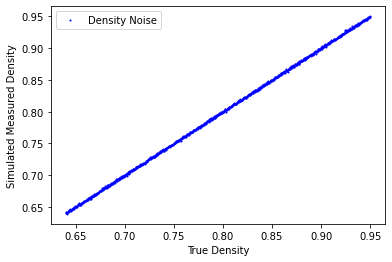

In [3]:
# density definitions
# density will climb from 0.64 to ideally 1 (but always slightly less) (somewhere between 0.85 and 1)
# we will take density from 0.64 to 0.95 (1000 points in between)
# we can add in some gaussian noise here as GN

F_True = np.linspace(0.64, 0.95, num = 1000)

mu = 0

sigma = 0.001

GN = np.random.normal(mu, sigma, 1000)

F = F_True + GN

#Plot density with GN vs true density

plt.plot(F_True, F, 'bo', label="Density Noise", markersize=1)
plt.xlabel('True Density')
plt.ylabel('Simulated Measured Density')
plt.legend()
plt.show()


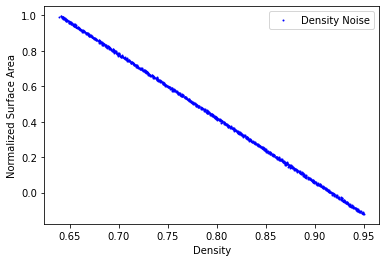

In [4]:
# Determine the SA from the density
# recreate the gaussian noise and add it to SA
# cannot use the same GN must recreate it

S = a + b*F_True

GN = np.random.normal(mu, sigma, 1000)

S = S + GN


#Plot the density vs SA
# as the SA decrease the density will increase

plt.plot(F, S, 'bo', label="Density Noise", markersize=1)
plt.xlabel('Density')
plt.ylabel('Normalized Surface Area')
plt.legend()
plt.show()


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
# selecting random samples for determination of a and b coefficients
# NM is the number of randomnly selected measurements from the dataset
# AE and BE are A_error and B_error zeros matrix to be filled by the for loop
# AE_sam and BE_sam are A_error and B_error zeros matrix to be filled by the for loop # of samples is varied 3-12

AE_full = np.zeros(1000)
BE_full = np.zeros(1000)

AE_sam_m = np.zeros(10)
BE_sam_m = np.zeros(10)

AE_sam_st = np.zeros(10)
BE_sam_st = np.zeros(10)

for i in range (3,13):
    NM = i
    for n in range(0,1000):
        x = random.randint(1000, size=(NM))
    # x is the index for the random selection
        F_NM = F[x]
        S_NM = S[x]
    # reshape to perform linear regression
        F_NM_reshaped = F_NM.reshape((-1,1))

        reg = LinearRegression().fit(F_NM_reshaped, S_NM)

        b_pred = reg.coef_
        a_pred = reg.intercept_

        y_true = np.array([a,b])
        y_pred = np.array([a_pred ,b_pred])
    # Calculate the error in A and B    
        A_error = np.abs((a_pred - a)/a_pred)*100 
        B_error = np.abs((b_pred - b)/b_pred) *100
    # Store the error calc in an array   
        AE_full[n] = A_error
        BE_full[n] = B_error    
    # Calculate the average and st dev in a and b
    AE_mean = np.mean(AE_full)
    BE_mean = np.mean(BE_full)
    AE_stdev = np.std(AE_full)
    BE_stdev = np.std(BE_full)
    
    AE_sam_m[i-3] = AE_mean
    BE_sam_m[i-3] = BE_mean
    AE_sam_st[i-3] = AE_stdev
    BE_sam_st[i-3] = BE_stdev
    
    # Print the average and st dev in a and b at each iteration
    print(AE_mean)
    print(BE_mean)
    print(AE_stdev)
    print(BE_stdev) 

0.8667584807804994
0.998535314764795
1.1580522755057983
1.331981938129793
0.6022406165604512
0.6929368276585516
0.7376970417613327
0.8532237712446232
0.49246459281882915
0.5636308169817418
0.43760591581901903
0.499313489383659
0.38976283707851017
0.4477986434067569
0.3479985526929018
0.39569409715625065
0.3758372304085426
0.43463729922123906
0.31049536790697435
0.35843857637105475
0.30767542832233347
0.3519843289233396
0.24546561325631322
0.28333847856338
0.2914152337862664
0.33461658130216154
0.24328519345273394
0.2815944676292451
0.281965106863356
0.32567409677426895
0.22135454350370276
0.25913470237179526
0.2638892433377528
0.3028283424945958
0.2072889169737033
0.2390519437315144
0.252163038428367
0.2892802343867498
0.19531312364642286
0.22511625427015902


In [7]:
AE_sam_m

array([0.86675848, 0.60224062, 0.49246459, 0.38976284, 0.37583723,
       0.30767543, 0.29141523, 0.28196511, 0.26388924, 0.25216304])

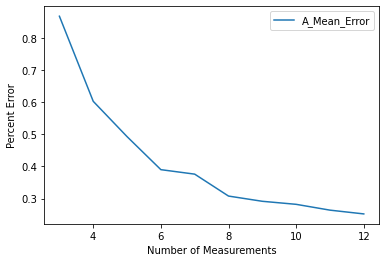

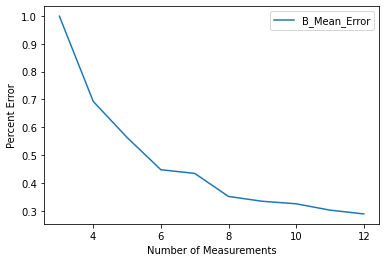

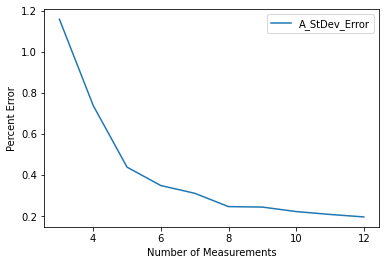

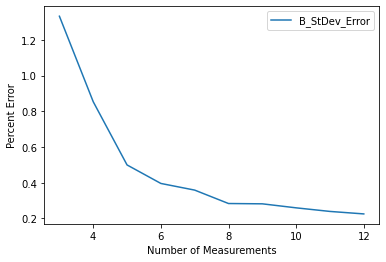

In [8]:
#Make sure Num_samples is the same as the i range
# that is the for loop directly above

Num_samples = np.arange(3,13)


plt.plot(Num_samples, AE_sam_m, label="A_Mean_Error")
plt.xlabel('Number of Measurements')
plt.ylabel('Percent Error')
plt.legend()
plt.show()

plt.plot(Num_samples, BE_sam_m, label="B_Mean_Error")
plt.xlabel('Number of Measurements')
plt.ylabel('Percent Error')
plt.legend()
plt.show()

plt.plot(Num_samples, AE_sam_st, label="A_StDev_Error")
plt.xlabel('Number of Measurements')
plt.ylabel('Percent Error')
plt.legend()
plt.show()

plt.plot(Num_samples, BE_sam_st, label="B_StDev_Error")
plt.xlabel('Number of Measurements')
plt.ylabel('Percent Error')
plt.legend()
plt.show()

In [9]:
import pandas as pd 
import csv

# assign header columns
header = ['A Mean Error', 'B Mean Error', 'A StDev', 'B StDev']

Full = np.stack((AE_sam_m , BE_sam_m,  AE_sam_st,  BE_sam_st), axis = 1)

Full_pd = np.asarray(Full)

pd.DataFrame(Full_pd).to_csv('sample.csv')

